In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha

/content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha


In [10]:
%pwd

'/content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha'

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

2. Scroll down to API and click Create New API Token.

3. Open up `kaggle.json` and use the username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 39.9 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080076 sha256=432df25e8e05c944738ad04a85d987712f5d48b1f87f5992a2711d5cf7d16640
  Stored in directory: /root/.cache/pip/wheels/0e/c4/ce/fecee9e6406e166eaba4e09b1acd2096a84ffef5275ea90806
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.6.2
    Uninstalling bokeh-3.6.2:
      Successfully uninstalled bokeh-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

### Setup Kaggle API Key

In [11]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ankitharathod"
kaggle_key = "865b656113638e0b51c7aff7cff02eb8"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [13]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 458kB/s]
100% 189k/189k [00:00<00:00, 453kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [14]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [15]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [18]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000   
50%        1.000000      1.000000     20.50000     24.240000     62.000000   
75%        1.000000      2.000000     26.24000     31.060000     77.000000   
max        1.000000      4.000000     41.00000     45.455000    100.000000   
std        0.466159      0.633839      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

In [16]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [19]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv',parse_dates=["datetime"])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [20]:
ignored_columns = ["casual", "registered"]
predictor = TabularPredictor(
    label='count',
    problem_type="regression",
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20250125_063550"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.03 GB / 12.67 GB (87.0%)
Disk Space Avail:   2.20 GB / 15.00 GB (14.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	Th

(_ray_fit pid=4627) [1000]	valid_set's rmse: 129.692


(_ray_fit pid=4750) 
(_ray_fit pid=4750) 
(_ray_fit pid=4750) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=4750) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=4750) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=4750) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=4750)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=4799) 
(_ray_fit pid=4799) 
(_ray_fit pid=4799) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=4799) Dask dataframe

(_ray_fit pid=4799) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster]


(_ray_fit pid=4854) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=4854) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=4854) 
(_ray_fit pid=4854) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=4854) This will raise in a future version.
(_ray_fit pid=4854) 
(_ray_fit pid=4854)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=4854) [3000]	valid_set's rmse: 126.147 [repeated 3x across cluster]


(_ray_fit pid=4917) 
(_ray_fit pid=4917) 
(_ray_fit pid=4917) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=4917) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=4917) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=4917) This will raise in a future version.
(_ray_fit pid=4917)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=4917) [2000]	valid_set's rmse: 134.443 [repeated 4x across cluster]


(_ray_fit pid=4854) 	Ran out of time, early stopping on iteration 7996. Best iteration is:
(_ray_fit pid=4854) 	[7106]	valid_set's rmse: 125.339


(_ray_fit pid=4917) [5000]	valid_set's rmse: 132.706 [repeated 5x across cluster]


(_ray_fit pid=4917) 	Ran out of time, early stopping on iteration 7821. Best iteration is:
(_ray_fit pid=4917) 	[7329]	valid_set's rmse: 132.331
(_ray_fit pid=5042) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5042) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5042) 
(_ray_fit pid=5042) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5042) This will raise in a future version.
(_ray_fit pid=5042) 
(_ray_fit pid=5042)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=5042) [1000]	valid_set's rmse: 137.712 [repeated 3x across cluster]


(_ray_fit pid=5116) 
(_ray_fit pid=5116) 
(_ray_fit pid=5116) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5116) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5116) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5116) This will raise in a future version.
(_ray_fit pid=5116)   warnings.warn(msg, FutureWarning)


(_ray_fit pid=5042) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=5116) [3000]	valid_set's rmse: 138.261 [repeated 5x across cluster]


(_ray_fit pid=5042) 	Ran out of time, early stopping on iteration 7973. Best iteration is:
(_ray_fit pid=5042) 	[6258]	valid_set's rmse: 135.071


(_ray_fit pid=5116) [5000]	valid_set's rmse: 137.961 [repeated 3x across cluster]


(_dystack pid=4440) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4440) 	78.76s	 = Training   runtime
(_dystack pid=4440) 	10.83s	 = Validation runtime
(_dystack pid=4440) Fitting model: LightGBM_BAG_L1 ... Training model for up to 3.34s of the 50.78s of remaining time.
(_dystack pid=4440) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
(_ray_fit pid=5235) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5235) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5235) 
(_ray_fit pid=5235) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5235) This will raise in a future version.
(_ray_fit pid=5235) 
(_ray_fit pid=5235)   warnings.warn(msg, FutureWarning)
(_ray_fit pid=5236) 
(_ray_fit pid=5236) 
(_ray_fit pid=5235) 	Ran out of time, early sto

(_ray_fit pid=5606) [1000]	valid_set's rmse: 70.2983
(_ray_fit pid=5605) [1000]	valid_set's rmse: 70.1838


(_ray_fit pid=5699) 
(_ray_fit pid=5699) 
(_ray_fit pid=5699) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=5699) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5699) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5699) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5699)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=5733) 
(_ray_fit pid=5733) 


(_ray_fit pid=5699) [1000]	valid_set's rmse: 77.973
(_ray_fit pid=5733) [1000]	valid_set's rmse: 73.5851


(_ray_fit pid=5699) 	Ran out of time, early stopping on iteration 1406. Best iteration is:
(_ray_fit pid=5699) 	[1255]	valid_set's rmse: 77.7265
(_ray_fit pid=5817) 
(_ray_fit pid=5817) 
(_ray_fit pid=5817) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=5817) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5817) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5817) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5817)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=5814) 
(_ray_fit pid=5814) 


(_ray_fit pid=5814) [1000]	valid_set's rmse: 76.6246
(_ray_fit pid=5817) [1000]	valid_set's rmse: 76.8034


(_ray_fit pid=5817) 	Ran out of time, early stopping on iteration 1263. Best iteration is:
(_ray_fit pid=5817) 	[1042]	valid_set's rmse: 76.7232
(_ray_fit pid=5920) 
(_ray_fit pid=5920) 
(_ray_fit pid=5920) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=5920) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=5920) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=5920) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=5920)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]
(_ray_fit pid=5958) 
(_ray_fit pid=5958) 


(_ray_fit pid=5920) [1000]	valid_set's rmse: 72.2921
(_ray_fit pid=5958) [1000]	valid_set's rmse: 75.7802


(_dystack pid=4440) 	-74.1067	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4440) 	39.41s	 = Training   runtime
(_dystack pid=4440) 	2.47s	 = Validation runtime
(_ray_fit pid=5958) /usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=5958) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=5958) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=5958) This will raise in a future version.
(_ray_fit pid=5958)   warnings.warn(msg, FutureWarning)
(_dystack pid=4440) Fitting model: WeightedEnsemble_L3 ... Training model for up to 142.26s of the -22.42s of remaining time.
(_dystack pid=4440) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.958, 'KNeighborsDist_BAG_L1': 0.042}
(_dystack pid=4440) 	-74.0741	 = Validation score   (-root_mean_squared_error)
(_dystack pid=4440) 	0.02s	 = Training   runtime
(_dystack pid=4440) 	0.0s	 = Validation runtime
(_d

### Review AutoGluon's training run with ranking of models that did the best.

In [21]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.109979  root_mean_squared_error      25.441346  399.562050                0.000651           0.030181            3       True         12
1   RandomForestMSE_BAG_L2  -53.432184  root_mean_squared_error      19.621312  297.788341                0.857305          51.564111            2       True         11
2          LightGBM_BAG_L2  -54.980093  root_mean_squared_error      19.164381  276.500370                0.400374          30.276140            2       True         10
3        LightGBMXT_BAG_L2  -60.584707  root_mean_squared_error      24.183016  317.691617                5.419009          71.467387            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.087018    0.058878   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.04126496880394,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

In [23]:
# Leaderboard dataframe
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

model   score_val              eval_metric  \
0      WeightedEnsemble_L3  -53.109979  root_mean_squared_error   
1   RandomForestMSE_BAG_L2  -53.432184  root_mean_squared_error   
2          LightGBM_BAG_L2  -54.980093  root_mean_squared_error   
3        LightGBMXT_BAG_L2  -60.584707  root_mean_squared_error   
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error   
5      WeightedEnsemble_L2  -84.125061  root_mean_squared_error   
6    KNeighborsUnif_BAG_L1 -101.546199  root_mean_squared_error   
7   RandomForestMSE_BAG_L1 -116.548359  root_mean_squared_error   
8     ExtraTreesMSE_BAG_L1 -124.600676  root_mean_squared_error   
9          CatBoost_BAG_L1 -131.041265  root_mean_squared_error   
10         LightGBM_BAG_L1 -131.054162  root_mean_squared_error   
11       LightGBMXT_BAG_L1 -131.460909  root_mean_squared_error   

    pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  \
0       25.441346  399.562050                0.000651           0.030181   
1       19.621312  297.788341                0.857305          51.564111   
2       19.164381  276.500370                0.400374          30.276140   
3       24.183016  317.691617                5.419009          71.467387   
4        0.087018    0.058878                0.087018           0.058878   
5        0.087665    0.083605                0.000647           0.024727   
6        0.097310    0.061564                0.097310           0.061564   
7        0.583621   19.619864                0.583621          19.619864   
8        0.645226   10.276515                0.645226          10.276515   
9        0.105090  106.751319                0.105090         106.751319   
10       2.543880   34.779186                2.543880          34.779186   
11      14.701863   74.676903               14.701863          74.676903   

    stack_level  can_infer  fit_order  
0             3       True         12  
1             2       True         11  
2             2       True         10  
3             2       True          9  
4             1       True          2  
5             2       True          8  
6             1       True          1  
7             1       True          5  
8             1       True          7  
9             1       True          6  
10            1       True          4  
11            1       True          3

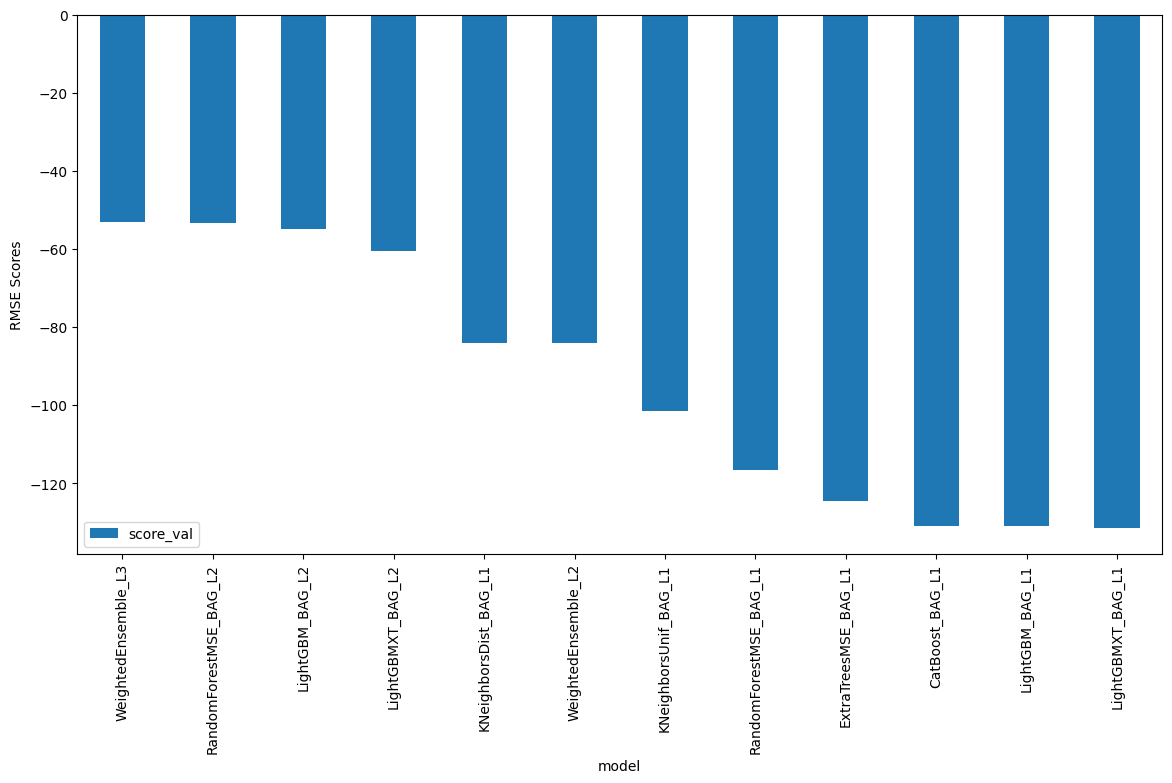

In [24]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

### Create predictions from test dataset

In [22]:
predictions = predictor.predict(test)
predictions.head()

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


0    23.619198
1    42.911087
2    46.340015
3    49.291130
4    52.393166
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [25]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.432198
std        89.851349
min         3.294955
25%        19.729107
50%        64.398293
75%       167.382385
max       368.923553
Name: count, dtype: float64

In [26]:
# How many negative values do we have?
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [27]:
# Set them to zero
predictions[predictions<0] = 0    # (In case, if negative values exist in the predictions, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


### Set predictions to submission dataframe, save, and submit

In [28]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [29]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 167kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2025-01-25 06:51:03  first raw submission                 complete  1.80522      1.80522       


#### Initial score of `1.80522`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

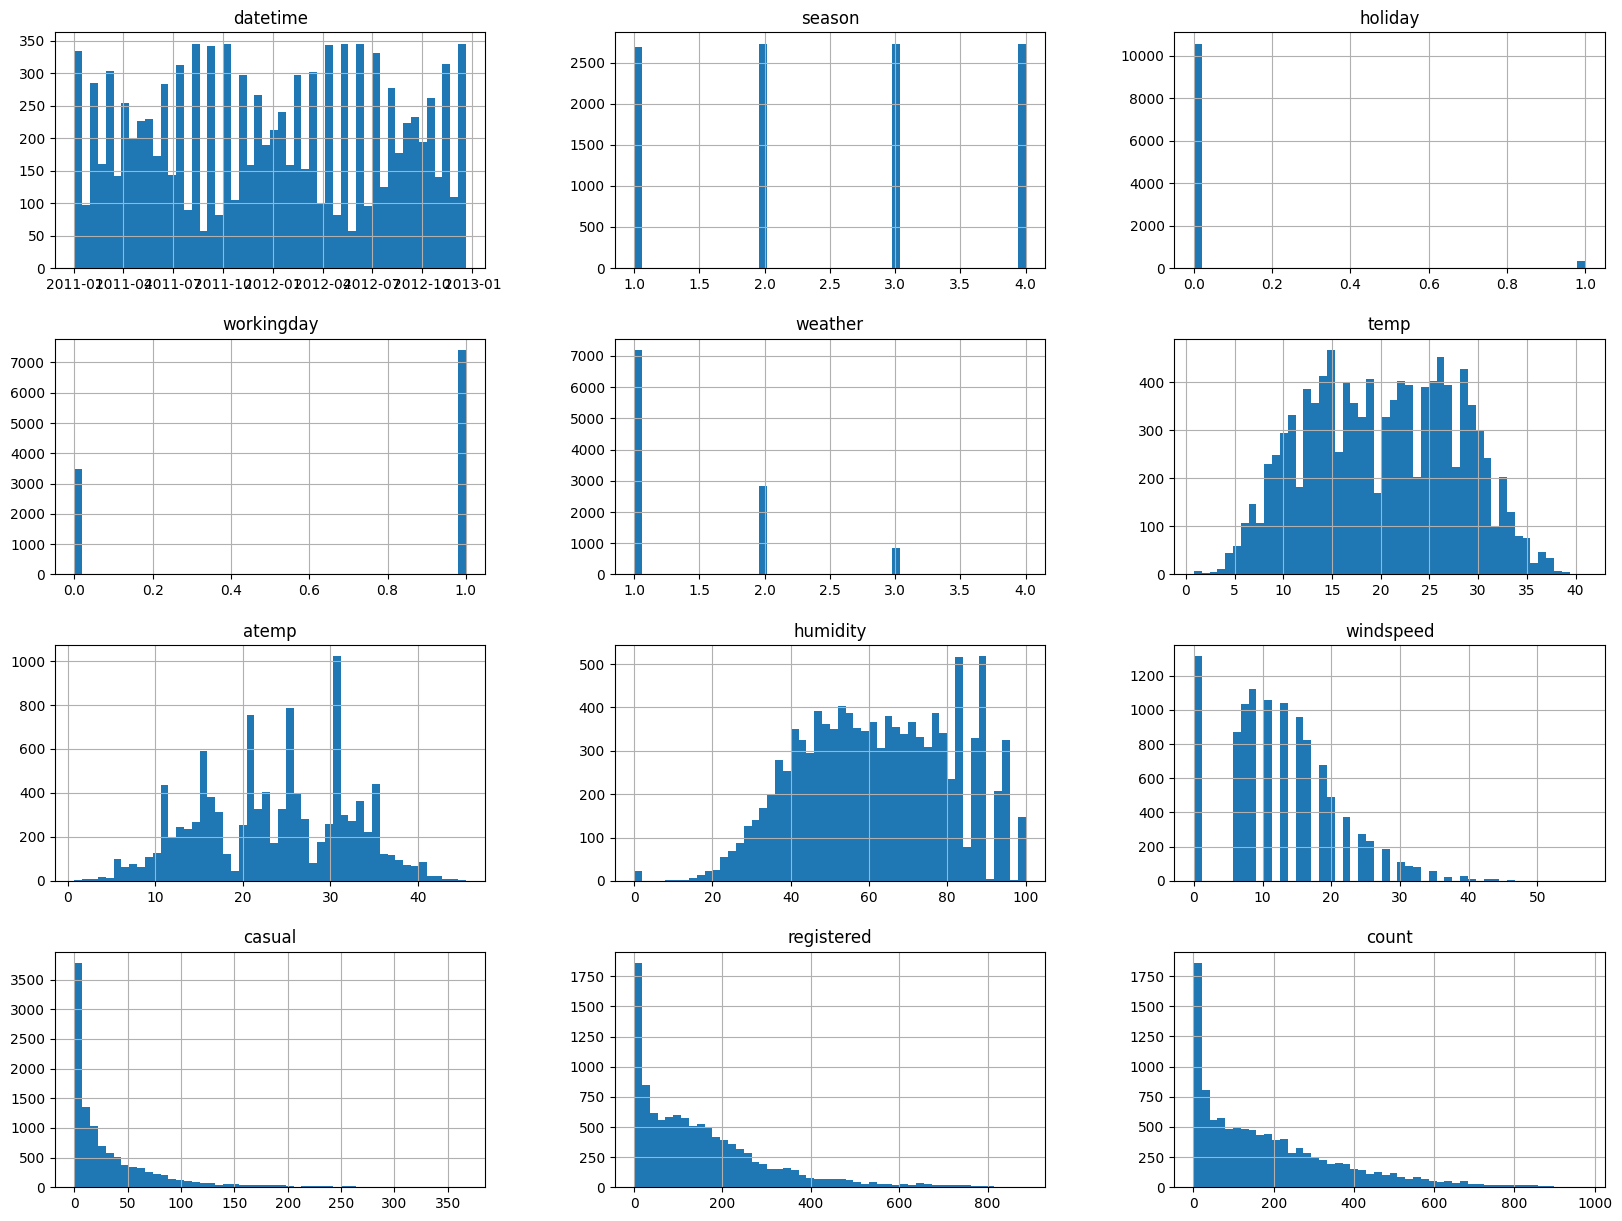

In [33]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(bins=50, figsize=(20,15))
plt.show()


**Observations from Graphs**


**Categorical Variables:** Features like season and weather are categorical, as evident from the plots. For season, bike rental counts are highest in Spring (0) and lowest in Winter (3), decreasing sequentially from Spring → Summer → Fall → Winter.

**Holiday and Working Day:**
Predictors holiday and workingday are one-hot encoded with values 0 and 1. Higher rental counts are observed on non-holidays (holiday = 0) and working days (workingday = 1).

**Datetime Feature:**
The datetime histogram shows randomness, as it represents timestamps, without any distinct trend.

**Continuous Variables:**
Features like temp, atemp, humidity, and windspeed show approximately normal distributions, except for windspeed, which exhibits a slightly positively skewed distribution.

**Exclusion of Invalid Features:**
Histogram plots for casual and registered are ignored in this analysis, as these features are absent in the test dataset and thus invalid for modeling.

In [34]:
# create a new feature
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [35]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [36]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4

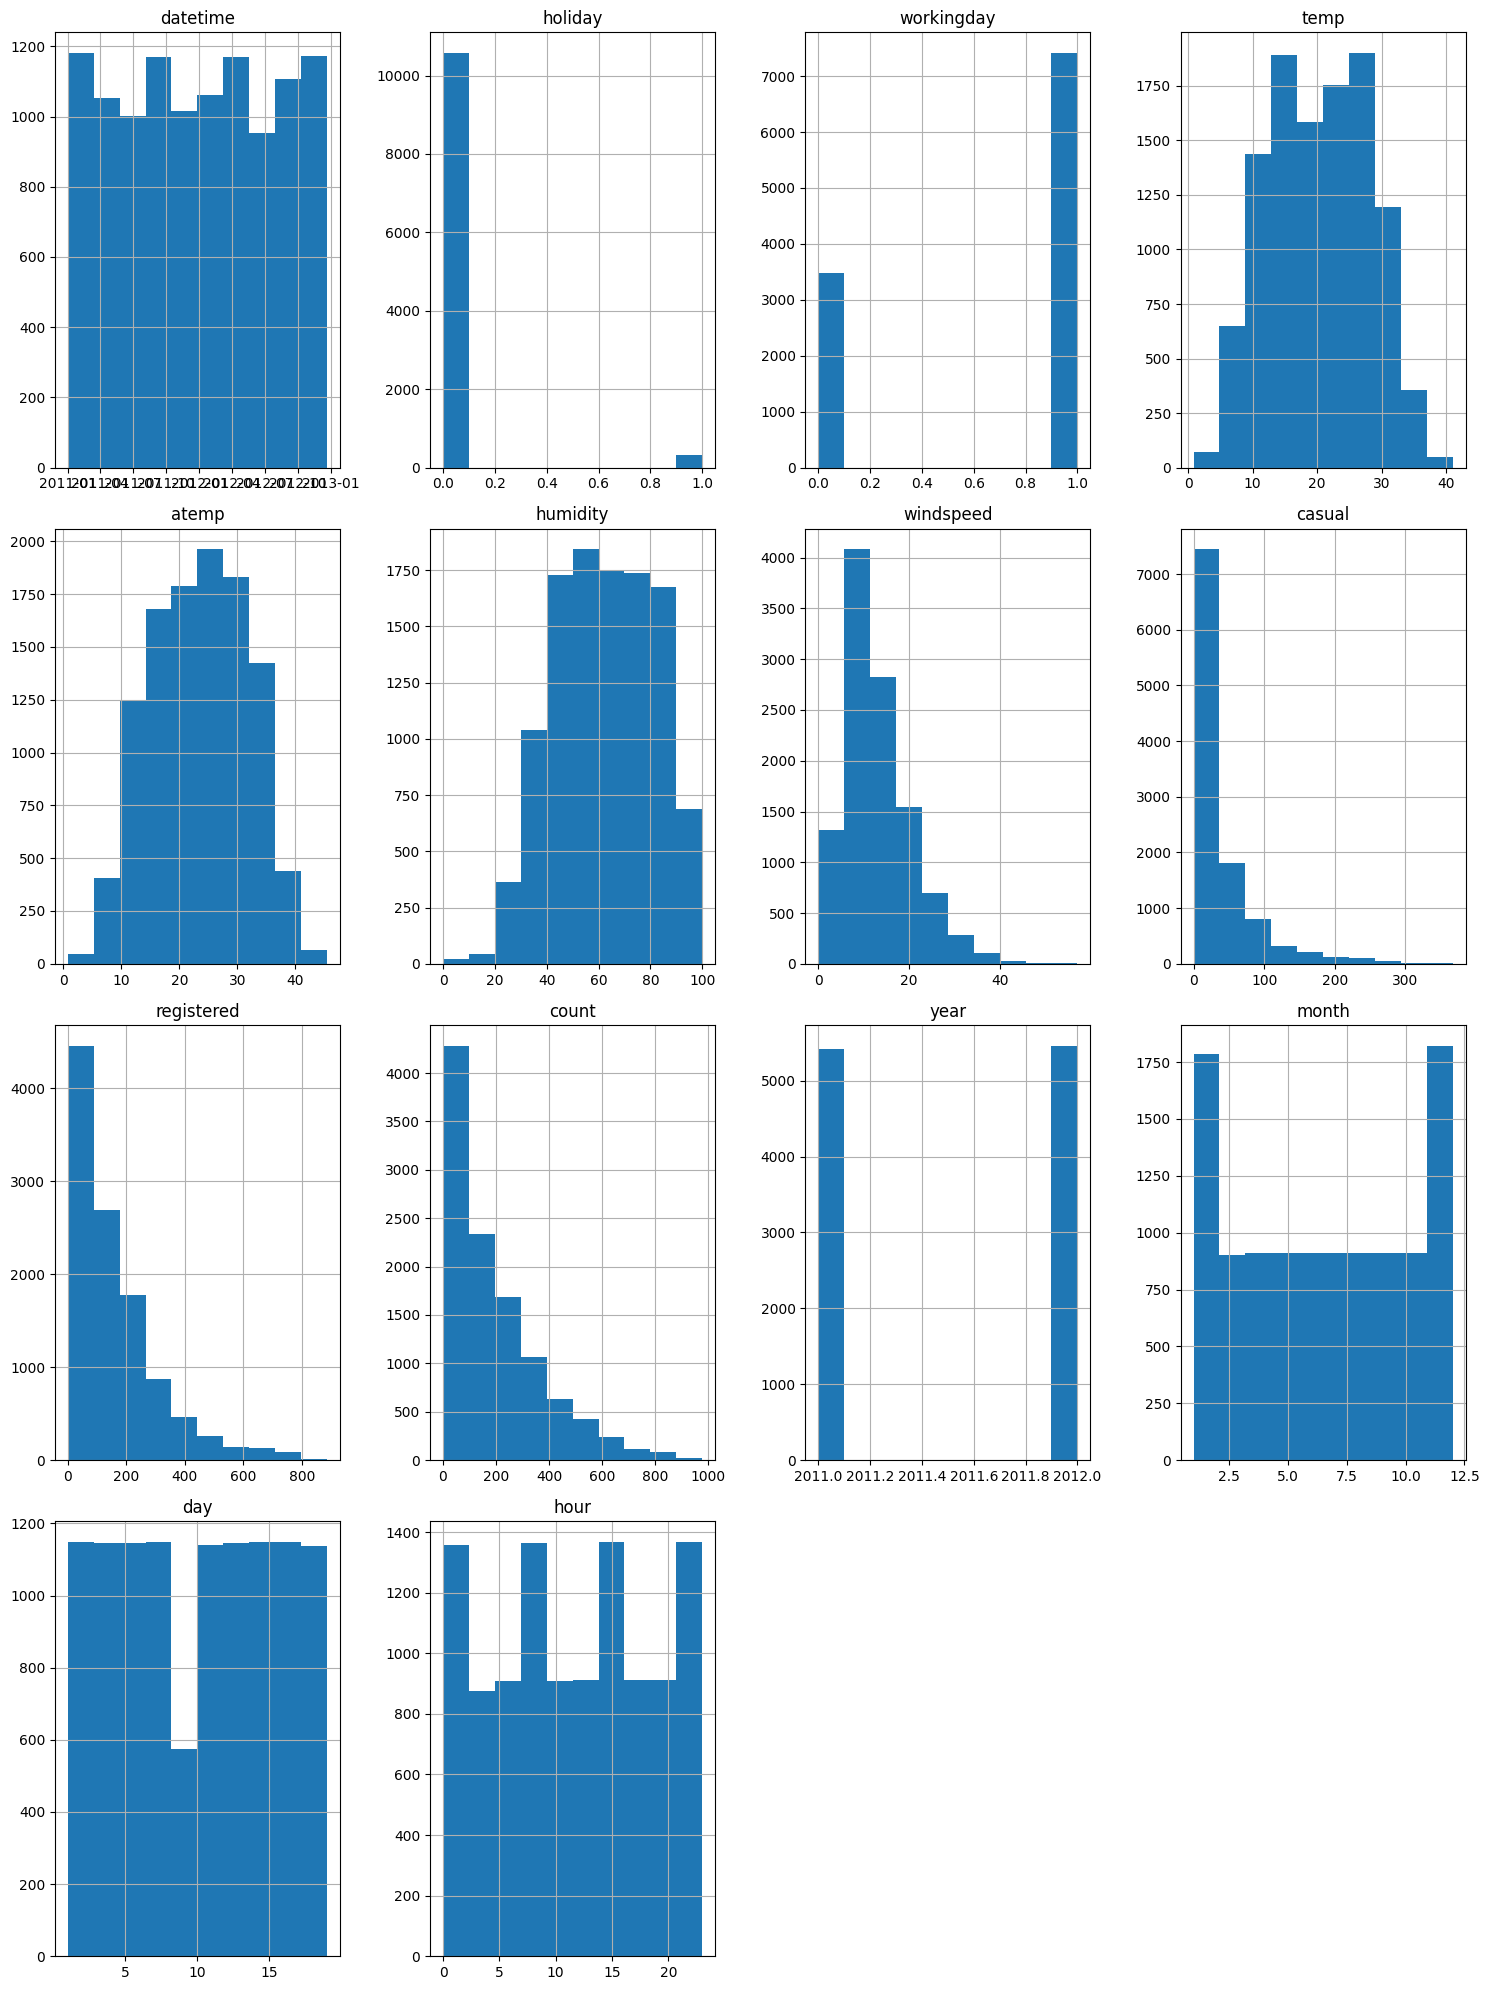

In [39]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))

plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [40]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse").fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20250125_071939"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.91 GB / 12.67 GB (78.1%)
Disk Space Avail:   1.10 GB / 15.00 GB (7.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This

In [41]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.392565  root_mean_squared_error      39.602065  383.056228                0.000996           0.040267            3       True         11
1          LightGBM_BAG_L2  -30.661079  root_mean_squared_error      36.876385  291.713012                0.532713          30.962388            2       True          9
2        LightGBMXT_BAG_L2  -31.187104  root_mean_squared_error      38.319427  301.472984                1.975755          40.722360            2       True          8
3   RandomForestMSE_BAG_L2  -31.840492  root_mean_squared_error      37.092601  311.331213                0.748930          50.580589            2       True         10
4      WeightedEnsemble_L2  -32.403266  root_mean_squared_error      36.257623  260.728215   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.424983594881716,
  'CatBoost_BAG_L1': -38.562605813232544,
  'WeightedEnsemble_L2': -32.40326631831238,
  'LightGBMXT_BAG_L2': -31.18710378436074,
  'LightGBM_BAG_L2': -30.66107

In [42]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = {'datetime': test['datetime'], 'Pred_count': predictions_new_features}
predictions_new_features = pd.DataFrame(data=predictions_new_features)
predictions_new_features.head()

datetime  Pred_count
0 2011-01-20 00:00:00   15.701647
1 2011-01-20 01:00:00    9.449829
2 2011-01-20 02:00:00    8.713043
3 2011-01-20 03:00:00    7.245523
4 2011-01-20 04:00:00    6.285190

In [43]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features['Pred_count']<0] = 0

In [44]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictions_new_features['Pred_count']
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 169kB/s]
Successfully submitted to Bike Sharing Demand

In [49]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2025-01-25 07:31:25  new features                         complete  0.61715      0.61715       
submission.csv               2025-01-25 06:51:03  first raw submission                 complete  1.80522      1.80522       


#### New Score of `0.61715`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [52]:
import autogluon.common as ag  # Import ag.space from autogluon.common
# From autogluon documentation
nn_options = {
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability
}

gbm_options = {
    'num_boost_round': 100,  # number of boosting rounds
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees
}

hyperparameters = {  # hyperparameters of each model type
    'GBM': gbm_options,
    'NN_TORCH': nn_options,
}

num_trials = 3  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse").fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600, presets='best_quality', hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20250125_073947"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.78 GB / 12.67 GB (77.2%)
Disk Space Avail:   0.27 GB / 15.00 GB (1.8%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.11%)
Fitted model: LightGBM_BAG_L1/T1 ...
	-40.2554	 = Validation score   (-root_mean_squared_error)
	30.31s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-39.2133	 = Validation score   (-root_mean_squared_error)
	29.7s	 = Training   runtime
	0.2s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-38.2356	 = Validation score   (-root_mean_squared_error)
	29.35s	 = Training   runtime
	0.24s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 135.07s of the 360.64s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 3                       |
+----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTorch_BAG_L1


2025-01-25 07:46:03,632	INFO timeout.py:54 -- Reached timeout of 135.06902743413448 seconds. Stopping all trials.
2025-01-25 07:46:03,690	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTorch_BAG_L1' in 0.0490s.
2025-01-25 07:46:13,739	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- bea891e5: FileNotFoundError('Could not fetch metrics for bea891e5: both result.json and progress.csv were not found at /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTorch_BAG_L1/bea891e5')
- 3399c2b8: FileNotFoundError('Could not fetch metrics for 3399c2b8: both result.json and progress.csv were not found at /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTo

Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 96.13s of the 213.59s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-37.3522	 = Validation score   (-root_mean_squared_error)
	30.24s	 = Training   runtime
	0.32s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-37.1415	 = Validation score   (-root_mean_squared_error)
	30.76s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-37.227	 = Validation score   (-root_mean_squared_error)
	31.02s	 = Training   runtime
	0.36s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 96.13s of the 121.18

+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L2   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 3                       |
+----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTorch_BAG_L2


2025-01-25 07:49:22,857	INFO timeout.py:54 -- Reached timeout of 96.13287123441697 seconds. Stopping all trials.
2025-01-25 07:49:22,944	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTorch_BAG_L2' in 0.0753s.
2025-01-25 07:49:32,980	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- f2b8e282: FileNotFoundError('Could not fetch metrics for f2b8e282: both result.json and progress.csv were not found at /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTorch_BAG_L2/f2b8e282')
- a50d7b30: FileNotFoundError('Could not fetch metrics for a50d7b30: both result.json and progress.csv were not found at /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947/models/NeuralNetTor

AutoGluon training complete, total runtime = 437.34s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 1220.0 rows/s (1361 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_073947")


In [53]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -36.914798  root_mean_squared_error       1.116259  151.161510                0.000800           0.024428            3       True          8
1   LightGBM_BAG_L2/T2 -37.141462  root_mean_squared_error       0.757925  120.114974                0.139756          30.761433            2       True          6
2   LightGBM_BAG_L2/T3 -37.227008  root_mean_squared_error       0.975702  120.375649                0.357534          31.022107            2       True          7
3   LightGBM_BAG_L2/T1 -37.352227  root_mean_squared_error       0.939188  119.598290                0.321020          30.244748            2       True          5
4  WeightedEnsemble_L2 -37.974578  root_mean_squared_error       0.436520   59.069492                0.000896         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -40.255448619289915,
  'LightGBM_BAG_L1/T2': -39.213258999645646,
  'LightGBM_BAG_L1/T3': -38.23556976473342,
  'WeightedEnsemble_L2': -37.97457757786581,
  'LightGBM_BAG_L2/T1': -37.35222709012397,
  'LightGBM_BAG_L2/T2': -37.14146225830332,
  'LightGBM_BAG_L2/T3': -37.22700787403071,
  'WeightedEnsemble_L3': -36.91479769238555},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1/T1': ['LightGBM_BAG_L1', 'T1'],
  'LightGBM_BAG_L1/T2': ['LightGBM_BAG_L1', 'T2'],
  'LightGBM_BAG_L1/T3': ['LightGBM_BAG_

In [54]:
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo = {'datetime': test['datetime'], 'Pred_count': prediction_new_hpo}
prediction_new_hpo = pd.DataFrame(data=prediction_new_hpo)
prediction_new_hpo.head()
# Remember to set all negative values to zero
prediction_new_hpo[prediction_new_hpo['Pred_count']<0] = 0


datetime  Pred_count
0 2011-01-20 00:00:00   12.047118
1 2011-01-20 01:00:00    6.676809
2 2011-01-20 02:00:00    6.066689
3 2011-01-20 03:00:00    6.028085
4 2011-01-20 04:00:00    6.028085

In [55]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('submission.csv')
submission_new_hpo["count"] = prediction_new_hpo['Pred_count']
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 165kB/s]
Successfully submitted to Bike Sharing Demand

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2025-01-25 07:49:39  new features with hyperparameters    complete  0.48536      0.48536       
submission_new_features.csv  2025-01-25 07:31:25  new features                         complete  0.61715      0.61715       
submission.csv               2025-01-25 06:51:03  first raw submission                 complete  1.80522      1.80522       


#### New Score of `0.48536`

## **Step 6_1: Hyper parameter optimization**

In [62]:
import autogluon.common as ag  # Import ag.space from autogluon.common

# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"



nn_options = {'num_epochs': 5,
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  }

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo_1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train,
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters,
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20250125_075447"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.77 GB / 12.67 GB (77.1%)
Disk Space Avail:   0.24 GB / 15.00 GB (1.6%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_075447"
Train Data Rows:    10886
Train Data Columns: 15
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT/T1 ...
	-78.818	 = Validation score   (-root_mean_squared_error)
	0.62s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT/T2 ...
	-46.2068	 = Validation score   (-root_mean_squared_error)
	0.87s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: LightGBMXT/T3 ...
	-47.7462	 = Validation score   (-root_mean_squared_error)
	1.2s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T4 ...
	-40.4993	 = Validation score   (-root_mean_squared_error)
	1.58s	 = Training   runtime
	0.19s	 = Validation runtime
Fitted model: LightGBMXT/T5 ...
	-63.01	 = Validation score   (-root_mean_squared_error)
	4.85s	 = Training   runtime
	0.24s	 = Validation runtime
Fitted model: LightGBMXT/T6 ...
	-105.7793	 = Validation score   (-root_mean_squared_error)
	1.38s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBMXT/T7 ...
	-45.387	 = Validation score   (-root_mean_squared_error)
	1.29s	 = Training 

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 36.7309
[1000]	valid_set's rmse: 36.6478
[1000]	valid_set's rmse: 37.9359
[2000]	valid_set's rmse: 36.5501
[3000]	valid_set's rmse: 36.1871
[4000]	valid_set's rmse: 36.0677
[5000]	valid_set's rmse: 36.0518
[6000]	valid_set's rmse: 36.0917
[1000]	valid_set's rmse: 35.5297
[1000]	valid_set's rmse: 36.5371
[2000]	valid_set's rmse: 35.9143
[1000]	valid_set's rmse: 36.3063
[2000]	valid_set's rmse: 35.902
[1000]	valid_set's rmse: 37.3556
[2000]	valid_set's rmse: 36.6394
[3000]	valid_set's rmse: 36.4532
[4000]	valid_set's rmse: 36.4775
[1000]	valid_set's rmse: 36.2236
[1000]	valid_set's rmse: 38.674
[2000]	valid_set's rmse: 37.7712
[3000]	valid_set's rmse: 37.3746
[4000]	valid_set's rmse: 37.1747
[5000]	valid_set's rmse: 37.1228
[6000]	valid_set's rmse: 37.1122
[7000]	valid_set's rmse: 37.1538
[8000]	valid_set's rmse: 37.1722
[1000]	valid_set's rmse: 41.0805
[2000]	valid_set's rmse: 38.5217
[3000]	valid_set's rmse: 37.9189
[4000]	valid_set's rmse: 37.6318
[5000]	valid

	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-36.5883	 = Validation score   (-root_mean_squared_error)
	2.79s	 = Training   runtime
	0.4s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-35.5328	 = Validation score   (-root_mean_squared_error)
	1.61s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-36.5418	 = Validation score   (-root_mean_squared_error)
	3.88s	 = Training   runtime
	0.4s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-36.0477	 = Validation score   (-root_mean_squared_error)
	15.55s	 = Training   runtime
	3.95s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-36.3146	 = Validation score   (-root_mean_squared_error)
	2.01s	 = Training   runtime
	0.21s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-35.5162	 = Validation score   (-root_mean_squared_error)
	4.1s	 = Training   runtime
	0.5s	 = Validation runtime
Fitted model: LightGBM/T7 ...
	-36.5438	 = Validation score   (-root_mean_squared_e

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 20               |
+---------------------------------------------------+

View detailed results here: /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_075447/models/NeuralNetTorch


2025-01-25 07:59:54,189	INFO timeout.py:54 -- Reached timeout of 134.80120180249216 seconds. Stopping all trials.
2025-01-25 07:59:54,261	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_075447/models/NeuralNetTorch' in 0.0599s.
2025-01-25 07:59:58,982	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 10 trial(s):
- a2b45484: FileNotFoundError('Could not fetch metrics for a2b45484: both result.json and progress.csv were not found at /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_075447/models/NeuralNetTorch/a2b45484')
- adfd52c6: FileNotFoundError('Could not fetch metrics for adfd52c6: both result.json and progress.csv were not found at /content/drive/MyDrive/Predict_Bike_Sharing_Demand_with_AutoGluon_Ankitha/AutogluonModels/ag-20250125_075447/models/NeuralNetTorch/adfd52c6'

	12.76s	 = Training   runtime
	0.25s	 = Validation runtime
Fitted model: NeuralNetTorch/f3045b32 ...
	-144.4229	 = Validation score   (-root_mean_squared_error)
	17.21s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/4c1646fc ...
	-142.2171	 = Validation score   (-root_mean_squared_error)
	17.13s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/51f242a4 ...
	-119.574	 = Validation score   (-root_mean_squared_error)
	30.05s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: NeuralNetTorch/15f8eb51 ...
	-266.525	 = Validation score   (-root_mean_squared_error)
	37.95s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: LightGBMLarge ... Training model for up to 134.80s of the 288.48s of remaining time.


[1000]	valid_set's rmse: 34.8118


	-34.7927	 = Validation score   (-root_mean_squared_error)
	8.77s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 257.87s of remaining time.
	Ensemble Weights: {'LightGBMLarge': 0.667, 'LightGBM/T6': 0.333}
	-34.537	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 342.32s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2698.6 rows/s (2178 batch size)
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` meth

In [63]:
predictor_new_hpo_1.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -34.536956  root_mean_squared_error       0.807091  12.888010                0.000513           0.014627            2       True          3
1        LightGBMLarge -34.792714  root_mean_squared_error       0.308420   8.769991                0.308420           8.769991            1       True          2
2          LightGBM/T6 -35.516199  root_mean_squared_error       0.498157   4.103392                0.498157           4.103392            1       True          1
Number of models trained: 3
Types of models trained:
{'WeightedEnsembleModel', 'LGBModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T6': 'LGBModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T6': -35.51619931582938,
  'LightGBMLarge': -34.79271419698779,
  'WeightedEnsemble_L2': -34.53695618917689},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T6': ['LightGBM', 'T6'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T6': 4.103391647338867,
  'LightGBMLarge': 8.769991397857666,
  'WeightedEnsemble_L2': 0.014626741409301758},
 'model_pred_times': {'LightGBM/T6': 0.498157262802124,
  'LightGBMLarge': 0.30842018127441406,
  'WeightedEnsemble_L2': 0.0005130767822265625},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/T6': {'learning_rate': 0.017357968430552234,
   'feature_fraction': 0.9590196908843444,
   'min_data_in_leaf': 22,
   'num_leaves': 96},
  'LightGBMLarge': {'learning_rate': 0.03,
   'num_l

In [64]:
# Leaderboard dataframe
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo_1.leaderboard(silent=True))
leaderboard_new_hpo_df

model  score_val              eval_metric  pred_time_val  \
0  WeightedEnsemble_L2 -34.536956  root_mean_squared_error       0.807091   
1        LightGBMLarge -34.792714  root_mean_squared_error       0.308420   
2          LightGBM/T6 -35.516199  root_mean_squared_error       0.498157   

    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  \
0  12.888010                0.000513           0.014627            2   
1   8.769991                0.308420           8.769991            1   
2   4.103392                0.498157           4.103392            1   

   can_infer  fit_order  
0       True          3  
1       True          2  
2       True          1

In [66]:
predictions_new_hpo_1 = predictor_new_hpo_1.predict(test)
predictions_new_hpo_1.head()

0    15.008099
1     3.561721
2     0.546843
3     2.988079
4     2.988079
Name: count, dtype: float32

In [67]:
predictions_new_hpo_1.describe()

count    6493.000000
mean      194.327423
std       174.863739
min        -6.499512
25%        48.954590
50%       152.641220
75%       286.734070
max       902.971313
Name: count, dtype: float64

In [68]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo
negative_pred_count = predictions_new_hpo_1.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo_1.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6448
Total negative prediction values : 45


In [78]:
# Remember to set all negative values to zero
predictions_new_hpo_1[predictions_new_hpo_1<0] = 0    # (In case, if negative values exist in the predictions_new_hpo, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo_1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [85]:
submission_new_hpo_1

datetime  count
0    2011-01-20 00:00:00      0
1    2011-01-20 01:00:00      0
2    2011-01-20 02:00:00      0
3    2011-01-20 03:00:00      0
4    2011-01-20 04:00:00      0
...                  ...    ...
6488 2012-12-31 19:00:00      0
6489 2012-12-31 20:00:00      0
6490 2012-12-31 21:00:00      0
6491 2012-12-31 22:00:00      0
6492 2012-12-31 23:00:00      0

[6493 rows x 2 columns]

In [89]:
submission_new_hpo_1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo_1["count"] = predictions_new_hpo_1
submission_new_hpo_1.to_csv("submission_new_hpo_1.csv", index=False)

In [90]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_1.csv -m "new features with hyperparameters_1"


100% 188k/188k [00:01<00:00, 161kB/s]
Successfully submitted to Bike Sharing Demand

In [92]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_1.csv     2025-01-25 08:12:39  new features with hyperparameters_1  complete  0.50915      0.50915       
submission_new_hpo.csv       2025-01-25 08:03:31  new features with hyperparameters_1  complete  0.48536      0.48536       
submission_new_hpo.csv       2025-01-25 07:49:39  new features with hyperparameters    complete  0.48536      0.48536       
submission_new_features.csv  2025-01-25 07:31:25  new features                         complete  0.61715      0.61715       
submission.csv               2025-01-25 06:51:03  first raw submission                 complete  1.80522      1.80522       
submission_new_hpo2.csv      2024-12-21 18:28:43  new features with hyperparameters 2  complete  4.76188      4.76188       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

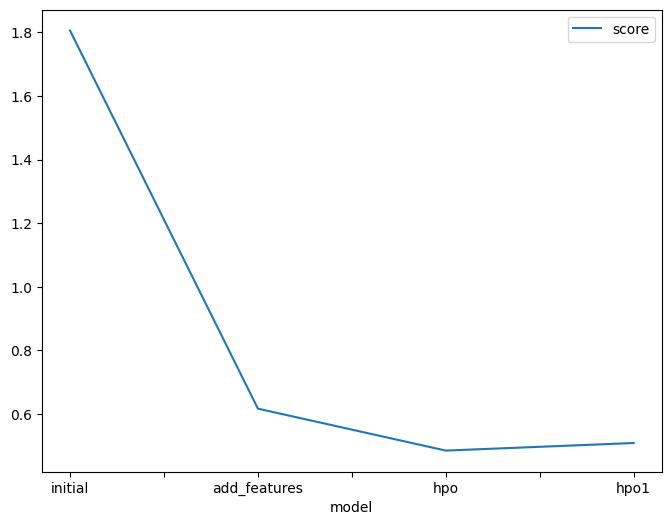

In [95]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo","hpo1"],
        "score": [1.80522, 0.61715, 0.48536,0.50915]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

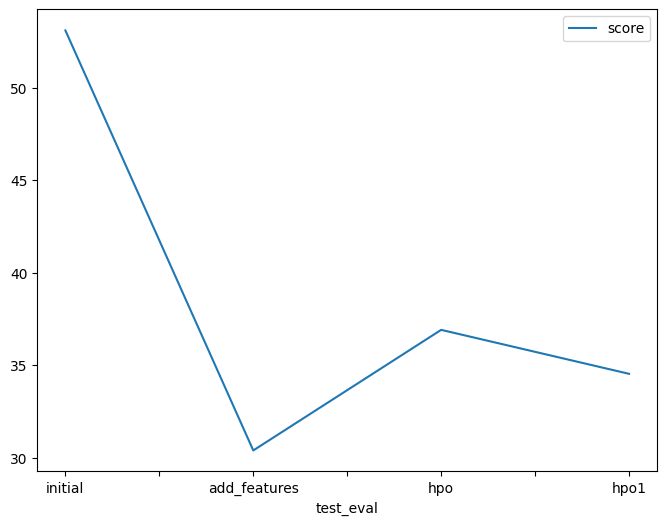

In [97]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo","hpo1"],
        "score": [53.109979, 30.392565, 36.914798,34.536956]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [101]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['default_vals', 'default_vals', 'Tree-Based Models'],
    "hpo2": ['default_vals', 'default_vals', 'KNN'],
    "hpo3": ['default_vals', 'default_vals', 'GBM: num_boost_round: 100'],
    "score": [1.80522, 0.61715, 0.48536]
})

model               hpo1          hpo2                       hpo3  \
0       initial       default_vals  default_vals               default_vals   
1  add_features       default_vals  default_vals               default_vals   
2           hpo  Tree-Based Models           KNN  GBM: num_boost_round: 100   

     score  
0  1.80522  
1  0.61715  
2  0.48536